In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Model name dictionary
model_names_dict = {
    'ngc': 'cMLP-2',
    'ngc0': 'cMLP-1',
    'nri': 'NRI',
    'tvar': 't-VAR',
    'ngc_srsv': 'cNSVM',
    'ngc_lstm': 'cLSTM'
}
model_color_dict = {
    'ngc': 'limegreen',
    'ngc0': 'orange',
    'nri': 'red',
    'tvar': 'aqua',
    'ngc_srsv': 'pink',
    'ngc_lstm': 'yellow'
}

# Intro

In [2]:
import numpy as np
import pandas as pd

In [16]:
experiment = f'2'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')

df = df.loc[df.c12 == 0] if int(experiment[0]) == 2 or int(experiment[0]) == 9 else df
df = df[df.n_data <= 8] if int(experiment[0]) == 3 else df
#df = df.drop(columns=['time']) if int(experiment[0]) == 3 else df
if int(experiment[0]) == 2 or int(experiment[0]) == 9:
    df.loc[df.sigma_eta_off_diag == -1, 'sigma_eta_off_diag'] = df.sigma_eta_diag
if 'prior' in df.columns:
    df.loc[df.prior == True, 'model'] = df[df.prior == True].model + '_sparse'

# Dataframe experiment # ALL OF THIS: 7,8
if 9 > int(experiment[0]) > 5:
    acc_cols = [c[:-4] for c in df.columns if c.endswith('_acc')]
    num_repetitions = len(df)

    df = pd.concat([df, df, df])
    df = df.reset_index(drop=True)
    df['dataset'] = sorted(acc_cols * num_repetitions)
    df['accuracy'] = np.zeros(df.shape[0])
    for acc_col in acc_cols:
        df.loc[df.dataset == acc_col, 'accuracy'] = df.loc[df.dataset == acc_col, f"{acc_col}_acc"]

df

,model,accuracy,seed,c11,c12,c21,c22,sigma_eta_diag,sigma_eta_off_diag
0,ngc,1.0,1,0.8,0.0,0,0.8,0.01,0.00
1,ngc,1.0,101,0.8,0.0,0,0.8,0.01,0.00
2,ngc,1.0,33,0.8,0.0,0,0.8,0.01,0.00
3,ngc,1.0,12,0.8,0.0,0,0.8,0.01,0.00
4,ngc,1.0,0,0.8,0.0,0,0.8,0.01,0.00
...,...,...,...,...,...,...,...,...,...
150,tvar,0.5,1,0.8,0.0,0,0.8,0.02,0.02
151,tvar,0.5,101,0.8,0.0,0,0.8,0.02,0.02
152,tvar,0.5,33,0.8,0.0,0,0.8,0.02,0.02
153,tvar,0.5,12,0.8,0.0,0,0.8,0.02,0.02


In [17]:
addition = []
if experiment == '0':
    addition += ['trainset_size']
elif experiment == '1a':
    addition += ['c11', 'c22']
elif experiment == '1b':
    addition += ['c21']
elif experiment == '1c':
    addition += ['c12']
elif experiment == '1d':
    addition += ['c12', 'c21']
elif experiment == '2' or experiment == '9':
    addition += ['c11', 'c12', 'c21', 'sigma_eta_diag', 'sigma_eta_off_diag']
elif experiment == '3':
    addition += ['n_data']
elif experiment == '4':
    addition += ['sparsity']
elif experiment == '5':
    addition += ['c11', 'c12', 'c21', 'c22']
elif experiment == '7' or experiment == '8':
    addition += ['dataset']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,c11,c12,c21,sigma_eta_diag,sigma_eta_off_diag,acc_mean,acc_std
0,ngc,0.8,0.0,0,0.01,0.00,1.00,0.000000
1,ngc,0.8,0.0,0,0.01,0.01,0.50,0.000000
2,ngc,0.8,0.0,0,0.02,0.00,1.00,0.000000
3,ngc,0.8,0.0,0,0.02,0.02,0.50,0.000000
4,ngc0,0.8,0.0,0,0.01,0.00,1.00,0.000000
5,ngc0,0.8,0.0,0,0.01,0.01,0.50,0.000000
6,ngc0,0.8,0.0,0,0.02,0.00,1.00,0.000000
7,ngc0,0.8,0.0,0,0.02,0.02,0.50,0.000000
8,nri,0.8,0.0,0,0.01,0.00,0.45,0.111803
9,nri,0.8,0.0,0,0.01,0.01,0.20,0.273861


In [11]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

C:\Users\User\AppData\Local\Temp\ipykernel_36556\1965764976.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
C:\Users\User\AppData\Local\Temp\ipykernel_36556\1965764976.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])


((2,), (2,))

['ngc0', 'ngc_noise']


C:\Users\User\anaconda3\envs\thesis\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\User\anaconda3\envs\thesis\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


KeyError: 'ngc_noise'

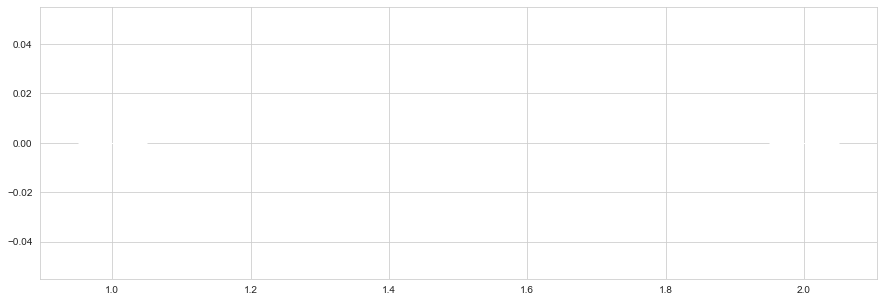

In [12]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Model name dictionary
model_names_dict = {
    'ngc': 'NGC',
    'ngc0': 'NGC-0',
    'nri': 'NRI',
    'tvar': 't-VAR',
    'nri_sparse': 'NRI(sparse prior)'
}
model_color_dict = {
    'ngc': 'limegreen',
    'ngc0': 'orange',
    'nri': 'red',
    'tvar': 'aqua',
    'nri_sparse': 'pink'
}

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity' if int(experiment[0]) >= 5 else 'Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment {int(experiment[0])+1-sub} {letter} \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/{experiment}/results_{experiment}')

# Show the plot.
plt.show()

# Experiment 1a

In [ ]:
experiment = f'0'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')
print("Length", len(df))
print("N models", len(set(df.model)))
df.loc[df['model'] == 'nri', 'accuracy'] += 0.5
df = df[df.trainset_size != 5_000]
df.sample(5)

In [ ]:
addition = ['trainset_size']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

title_name = '1 (a)'
filename = '1a'

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment {title_name} \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_{filename}')

# Show the plot.
plt.show()

# Experiment 1b

In [ ]:
experiment = f'0'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')
print("Length", len(df))
print("N models", len(set(df.model)))
df.loc[df['model'] == 'nri', 'accuracy'] += 0.5
df = df[df.tvt_split != 1.]
df = df[df.trainset_size != 5_000]
df.sample(5)

In [ ]:
addition = ['tvt_split']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

title_name = f'1 (b)'
filename = '1b'

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment {title_name} \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_{filename}')

# Show the plot.
plt.show()

# Experiment 2a

In [17]:
experiment = f'1a'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')
df = df[(df.prior == False) | (df.model != 'nri')][[c for c in df.columns if c != 'prior']]

df.loc[df['model'] == 'nri', 'accuracy'] *= (2/1)
df.loc[df['c11'] == 0, 'accuracy'] /= (2/1)

df.sample(5)

,model,accuracy,seed,c11,c12,c21,c22
42,ngc0,1.0,33,0.8,0.0,0.0,0.8
56,ngc,0.5,101,0.1,0.0,0.0,0.1
19,ngc0,1.0,0,0.3,0.0,0.0,0.3
10,ngc0,1.0,1,0.2,0.0,0.0,0.2
52,ngc,0.5,33,0.0,0.0,0.0,0.0


In [18]:
addition = ['c11', 'c22']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,c11,c22,acc_mean,acc_std
0,ngc,0.0,0.0,0.50,0.000000
1,ngc,0.1,0.1,0.50,0.000000
2,ngc,0.2,0.2,0.50,0.000000
3,ngc,0.3,0.3,0.50,0.000000
4,ngc,0.4,0.4,0.85,0.136931
5,ngc,0.5,0.5,1.00,0.000000
6,ngc,0.6,0.6,1.00,0.000000
7,ngc,0.7,0.7,1.00,0.000000
8,ngc,0.8,0.8,1.00,0.000000
9,ngc,0.9,0.9,1.00,0.000000


In [19]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

((4, 10), (4, 10))

['nri', 'ngc0', 'ngc', 'tvar']


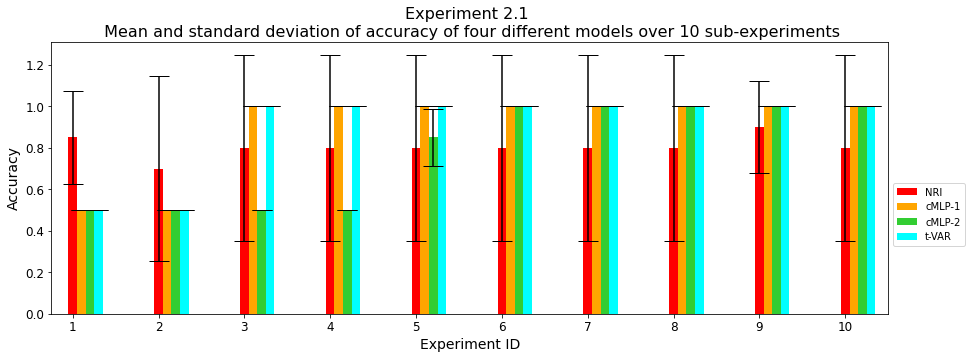

In [22]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment 2.1 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'./results/plots/results_2a.png')

# Show the plot.
plt.show()

# Experiment 2b

In [44]:
experiment = f'1b'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')

df.loc[df['model'] == 'nri', 'accuracy'] *= (2/1)

df.sample(10)

,model,accuracy,seed,c11,c12,c21,c22
60,ngc0,1.00,1,0.8,0.0,0.2,0.8
239,tvar,1.00,0,0.8,0.7,0.0,0.8
230,tvar,1.00,1,0.8,0.6,0.0,0.8
221,tvar,1.00,101,0.8,0.4,0.0,0.8
40,ngc,1.00,1,0.8,0.0,0.8,0.8
43,ngc,0.75,12,0.8,0.0,0.8,0.8
41,ngc,0.75,101,0.8,0.0,0.8,0.8
96,ngc0,1.00,101,0.8,0.0,0.9,0.8
176,tvar,1.00,101,0.8,0.0,0.5,0.8
105,nri,0.50,1,0.8,0.0,0.1,0.8


In [45]:
addition = ['c21']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results = df_results.sort_values(by='model')
df_results

,model,c21,acc_mean,acc_std
0,ngc,0.0,1.000000,0.000000
1,ngc,0.1,1.000000,0.000000
2,ngc,0.2,1.000000,0.000000
3,ngc,0.3,1.000000,0.000000
4,ngc,0.4,1.000000,0.000000
5,ngc,0.5,0.900000,0.136931
6,ngc,0.6,0.850000,0.136931
7,ngc,0.7,0.800000,0.111803
8,ngc,0.8,0.800000,0.111803
9,ngc,0.9,0.750000,0.000000


In [50]:
model_names = ['ngc', 'tvar', 'nri', 'ngc0']
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(model_names)])[:, ::-1]
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(model_names)])[:, ::-1]

mean_acc.shape, std_acc.shape

((4, 10), (4, 10))

['ngc', 'tvar', 'nri', 'ngc0']


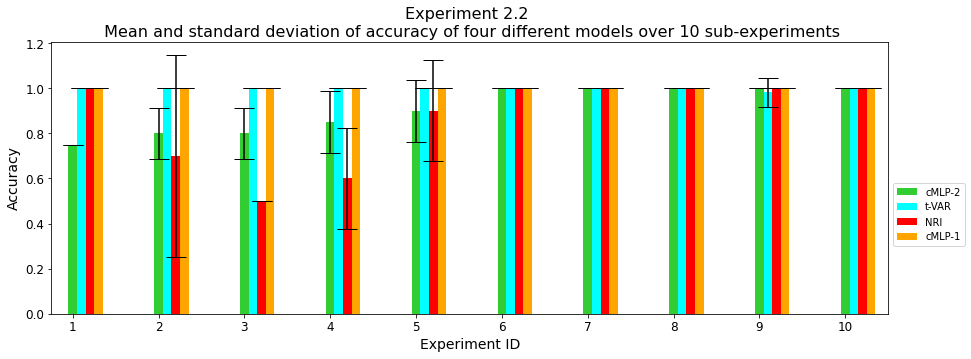

In [53]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
#model_names = list(set(df_results.model))
#model_names = ['ngc', 'tvar', 'nri', 'ngc0']
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity' if int(experiment[0]) >= 5 else 'Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment 2.2 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_2b.png')

# Show the plot.
plt.show()

# Experiment 2c

In [73]:
experiment = f'1c'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')

df.loc[df['model'] == 'nri', 'accuracy'] *= (2/1)
df.sample(5)

,model,accuracy,seed,c11,c12,c21,c22
55,ngc0,1.00,1,0.8,0.1,0.0,0.8
72,ngc0,1.00,33,0.8,0.4,0.0,0.8
152,tvar,0.75,33,0.8,0.0,0.0,0.8
13,ngc,1.00,12,0.8,0.2,0.0,0.8
185,tvar,1.00,1,0.8,0.7,0.0,0.8


In [74]:
addition = []
if experiment == '0':
    addition += ['trainset_size']
elif experiment == '1a':
    addition += ['c11', 'c22']
elif experiment == '1b':
    addition += ['c21']
elif experiment == '1c':
    addition += ['c12']
elif experiment == '1d':
    addition += ['c12', 'c21']
elif experiment == '2' or experiment == '9':
    addition += ['c11', 'c12', 'c21', 'sigma_eta_diag', 'sigma_eta_off_diag']
elif experiment == '3':
    addition += ['n_data']
elif experiment == '4':
    addition += ['sparsity']
elif experiment == '5':
    addition += ['c11', 'c12', 'c21', 'c22']
elif experiment == '7' or experiment == '8':
    addition += ['dataset']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,c12,acc_mean,acc_std
0,ngc,0.0,1.000000,0.000000
1,ngc,0.1,1.000000,0.000000
2,ngc,0.2,1.000000,0.000000
3,ngc,0.3,1.000000,0.000000
4,ngc,0.4,1.000000,0.000000
5,ngc,0.5,0.850000,0.136931
6,ngc,0.6,0.800000,0.111803
7,ngc,0.7,0.800000,0.111803
8,ngc,0.8,0.750000,0.000000
9,ngc,0.9,0.750000,0.000000


In [75]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

((4, 10), (4, 10))

['nri', 'ngc0', 'ngc', 'tvar']


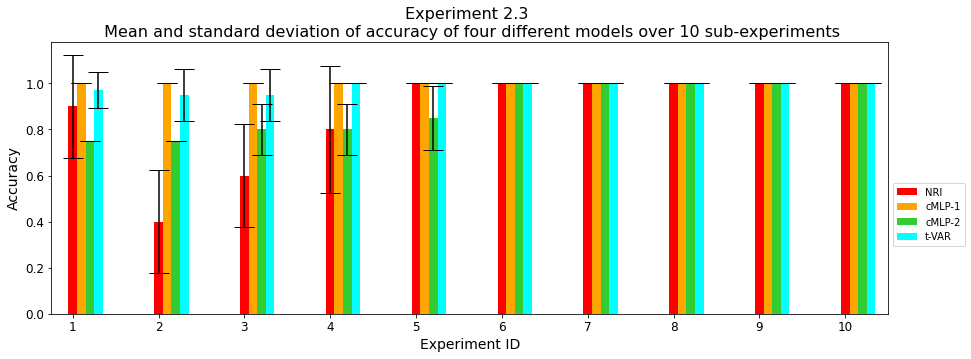

In [79]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    if model_name == 'ngc':
        y = y[::-1]
        error = error[::-1]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity' if int(experiment[0]) >= 5 else 'Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment 2.3 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_2c.png')

# Show the plot.
plt.show()

# Experiment 2d

In [ ]:
experiment = f'1d'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')

df.loc[df['model'] == 'nri', 'accuracy'] *= (2/1)
df = df[df['c12'] != 0.5]

df.sample(5)

In [ ]:
addition = []
if experiment == '0':
    addition += ['trainset_size']
elif experiment == '1a':
    addition += ['c11', 'c22']
elif experiment == '1b':
    addition += ['c21']
elif experiment == '1c':
    addition += ['c12']
elif experiment == '1d':
    addition += ['c12', 'c21']
elif experiment == '2' or experiment == '9':
    addition += ['c11', 'c12', 'c21', 'sigma_eta_diag', 'sigma_eta_off_diag']
elif experiment == '3':
    addition += ['n_data']
elif experiment == '4':
    addition += ['sparsity']
elif experiment == '5':
    addition += ['c11', 'c12', 'c21', 'c22']
elif experiment == '7' or experiment == '8':
    addition += ['dataset']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity' if int(experiment[0]) >= 5 else 'Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment {int(experiment[0])+1-sub} {letter} \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'./results/plots/results_2d')

# Show the plot.
plt.show()

# Experiment 3

In [135]:
experiment = f'contemp_cor_var'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')

#df = df[df.sigma_eta_diag != 0.01]

df.sample(5)

,model,accuracy,seed,c11,c12,c21,c22,sigma_eta_diag,sigma_eta_off_diag
132,tvar,1.00,33,0.8,0,0,0.8,0.10,0.00
157,tvar,1.00,33,0.8,0,0,0.8,0.01,0.01
4,ngc,0.50,0,0.8,0,0,0.8,0.50,0.00
97,nri,0.75,33,0.8,0,0,0.8,0.10,0.10
66,ngc0,1.00,101,0.8,0,0,0.8,0.05,0.04


In [136]:
addition = ['c11', 'c12', 'c21', 'sigma_eta_diag', 'sigma_eta_off_diag']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
#df_results = df_results.sort_values(by=['sigma_eta_diag', 'sigma_eta_off_diag'])
df_results

,model,c11,c12,c21,sigma_eta_diag,sigma_eta_off_diag,acc_mean,acc_std
0,ngc,0.8,0,0,0.01,0.000,1.00,0.000000
1,ngc,0.8,0,0,0.01,0.005,1.00,0.000000
2,ngc,0.8,0,0,0.05,0.000,0.95,0.111803
3,ngc,0.8,0,0,0.05,0.040,0.90,0.136931
4,ngc,0.8,0,0,0.10,0.000,0.90,0.136931
5,ngc,0.8,0,0,0.10,0.900,0.50,0.000000
6,ngc,0.8,0,0,0.50,0.000,0.50,0.000000
7,ngc,0.8,0,0,0.50,0.400,0.50,0.000000
8,ngc0,0.8,0,0,0.01,0.000,1.00,0.000000
9,ngc0,0.8,0,0,0.01,0.005,1.00,0.000000


In [137]:
model_names = ['ngc', 'tvar', 'nri', 'ngc0']
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(model_names)])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(model_names)])

mean_acc.shape, std_acc.shape

((4, 8), (4, 8))

['ngc', 'tvar', 'nri', 'ngc0']
(4, 8) (4, 8)


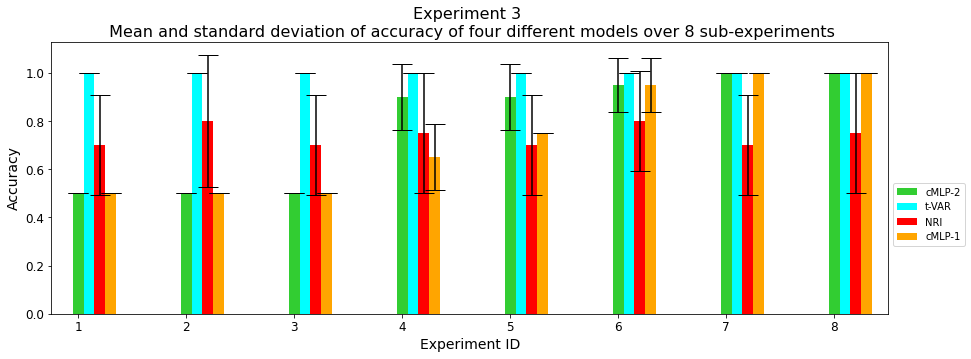

In [144]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
#model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc
print(mean_accuracy.shape, std_dev.shape)

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i][::-1]
    #if model_name == 'ngc0':
    #    y = y[::-1]
    error = std_dev[i][::-1]
    if model_name == 'nri':
        y = y[::-1]
        error = error[::-1]
    #if model_name == 'ngc0':
        #print(y)
        #y[4], y[5] = y[5], y[4]
        #print(error)
        #error[4], error[5] = error[5], error[4]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 3 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_3')

# Show the plot.
plt.show()

# Experiment 4 - Number of Variables

In [34]:
experiment = f'3'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')

df = df[df.n_data <= 8] if int(experiment[0]) == 3 else df
#df.loc[df.model == 'nri', 'accuracy'] = df[df.model == 'nri'].accuracy * (df.n_data / (df.n_data - 1))
#df.loc[, 'accuracy']
#df = df.drop(columns=['time']) if int(experiment[0]) == 3 else df
df.sample(5)
df[(df.model=='ngc') & (df.n_data == 7)]

,model,accuracy,seed,n_data,time
25,ngc,1.0,1,7,355.936248
26,ngc,1.0,101,7,364.798292
27,ngc,1.0,33,7,407.203987
28,ngc,1.0,12,7,347.656763
29,ngc,1.0,0,7,341.539101


In [24]:
addition = ['n_data']

groupby_columns = ['model'] + addition
df_time1 = df.groupby(by=groupby_columns).mean().rename(columns={'time':'time_mean'})[['time_mean']]
df_time1

time_mean
model n_data            
ngc   2       150.966259
      3       214.289612
      4       279.042142
      5       340.847698
      6       396.676377
      7       363.426878
      8       383.660015
ngc0  2        19.034423
      3        22.741435
      4        28.022992
      5        30.656956
      6        35.523429
      7        42.848753
      8        46.468598
nri   2        15.776943
      3        17.012685
      4        21.665163
      5        26.517221
      6        49.687824
      7       414.688507
      8       145.085838
tvar  2        28.807357
      3        56.098478
      4        96.968936
      5       186.350862
      6       232.839838
      7       418.462445
      8       628.708259

In [14]:
addition = ['n_data']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,n_data,acc_mean,acc_std
0,ngc,2,1.000000,0.000000
1,ngc,3,1.000000,0.000000
2,ngc,4,0.987500,0.027951
3,ngc,5,1.000000,0.000000
4,ngc,6,0.994444,0.012423
5,ngc,7,1.000000,0.000000
6,ngc,8,1.000000,0.000000
7,ngc0,2,1.000000,0.000000
8,ngc0,3,1.000000,0.000000
9,ngc0,4,0.987500,0.027951


In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity' if int(experiment[0]) >= 5 else 'Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment {int(experiment[0])+1-sub} {letter} \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_4.png')

# Show the plot.
plt.show()

# Experiment 5 - Sparsity

In [ ]:
experiment = f'4'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')

df.loc[df['model'] == 'nri', 'accuracy'] *= (8/7)

df.sample(5)

In [ ]:
addition = []
if experiment == '0':
    addition += ['trainset_size']
elif experiment == '1a':
    addition += ['c11', 'c22']
elif experiment == '1b':
    addition += ['c21']
elif experiment == '1c':
    addition += ['c12']
elif experiment == '1d':
    addition += ['c12', 'c21']
elif experiment == '2' or experiment == '9':
    addition += ['c11', 'c12', 'c21', 'sigma_eta_diag', 'sigma_eta_off_diag']
elif experiment == '3':
    addition += ['n_data']
elif experiment == '4':
    addition += ['sparsity']
elif experiment == '5':
    addition += ['c11', 'c12', 'c21', 'c22']
elif experiment == '7' or experiment == '8':
    addition += ['dataset']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity' if int(experiment[0]) >= 5 else 'Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment {int(experiment[0])+1-sub} {letter} \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_5.png')

# Show the plot.
plt.show()

# Experiment 6a

In [ ]:
experiment = f'5'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')
df.loc[df['model'] == 'nri', 'accuracy'] *= (2/1)
df.loc[df['model'] == 'ngc', 'accuracy'] *= (3/4)

df.sample(5)

In [ ]:
addition = []
if experiment == '0':
    addition += ['trainset_size']
elif experiment == '1a':
    addition += ['c11', 'c22']
elif experiment == '1b':
    addition += ['c21']
elif experiment == '1c':
    addition += ['c12']
elif experiment == '1d':
    addition += ['c12', 'c21']
elif experiment == '2' or experiment == '9':
    addition += ['c11', 'c12', 'c21', 'sigma_eta_diag', 'sigma_eta_off_diag']
elif experiment == '3':
    addition += ['n_data']
elif experiment == '4':
    addition += ['sparsity']
elif experiment == '5':
    addition += ['c11', 'c12', 'c21', 'c22']
elif experiment == '7' or experiment == '8':
    addition += ['dataset']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment {int(experiment[0])+1-sub} {letter} \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_6a.png')

# Show the plot.
plt.show()

# Experiment 6b

In [ ]:
experiment = f'0'

df = pd.read_csv(f'results/{experiment}/processed_data_{experiment}.csv', index_col='Unnamed: 0')

df = df.loc[df.c12 == 0] if int(experiment[0]) == 2 or int(experiment[0]) == 9 else df
df = df[df.n_data <= 8] if int(experiment[0]) == 3 else df
#df = df.drop(columns=['time']) if int(experiment[0]) == 3 else df
if int(experiment[0]) == 2 or int(experiment[0]) == 9:
    df.loc[df.sigma_eta_off_diag == -1, 'sigma_eta_off_diag'] = df.sigma_eta_diag
if 'prior' in df.columns:
    df.loc[df.prior == True, 'model'] = df[df.prior == True].model + '_sparse'

# Dataframe experiment # ALL OF THIS: 7,8
if 9 > int(experiment[0]) > 5:
    acc_cols = [c[:-4] for c in df.columns if c.endswith('_acc')]
    num_repetitions = len(df)

    df = pd.concat([df, df, df])
    df = df.reset_index(drop=True)
    df['dataset'] = sorted(acc_cols * num_repetitions)
    df['accuracy'] = np.zeros(df.shape[0])
    for acc_col in acc_cols:
        df.loc[df.dataset == acc_col, 'accuracy'] = df.loc[df.dataset == acc_col, f"{acc_col}_acc"]

In [ ]:
addition = []
if experiment == '0':
    addition += ['trainset_size']
elif experiment == '1a':
    addition += ['c11', 'c22']
elif experiment == '1b':
    addition += ['c21']
elif experiment == '1c':
    addition += ['c12']
elif experiment == '1d':
    addition += ['c12', 'c21']
elif experiment == '2' or experiment == '9':
    addition += ['c11', 'c12', 'c21', 'sigma_eta_diag', 'sigma_eta_off_diag']
elif experiment == '3':
    addition += ['n_data']
elif experiment == '4':
    addition += ['sparsity']
elif experiment == '5':
    addition += ['c11', 'c12', 'c21', 'c22']
elif experiment == '7' or experiment == '8':
    addition += ['dataset']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Model name dictionary
model_names_dict = {
    'ngc': 'NGC',
    'ngc0': 'NGC-0',
    'nri': 'NRI',
    'tvar': 't-VAR',
    'nri_sparse': 'NRI(sparse prior)'
}
model_color_dict = {
    'ngc': 'limegreen',
    'ngc0': 'orange',
    'nri': 'red',
    'tvar': 'aqua',
    'nri_sparse': 'pink'
}

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity' if int(experiment[0]) >= 5 else 'Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
letter = '' if len(experiment) == 1 else f'({experiment[1]})'
sub = 0 if int(experiment[0]) < 7 else 1
plt.title(f'Experiment {int(experiment[0])+1-sub} {letter} \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/{experiment}/results_{experiment}')

# Show the plot.
plt.show()

# Experiment 7a

In [ ]:
experiment = f'7a'

df = pd.read_csv(f'results/SVM/55/processed_data_55.csv', index_col='Unnamed: 0')
[(len(df[(df.trainset_size==l) & (df.model=='ngc_lstm')]), len(df[(df.trainset_size==l) & (df.model=='ngc_srsv')]), l) for l in set(df.trainset_size)]

In [ ]:
addition = ['trainset_size']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 7 (a) \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_7a.png')

# Show the plot.
plt.show()

# Experiment 7b

In [16]:
experiment = f'7b'

df = pd.read_csv(f'results/SVM/55/processed_data_55.csv', index_col='Unnamed: 0')
df = df[(df.tvt_split == 0.1) | (df.tvt_split == 0.2) | (df.tvt_split == 0.4) | (df.tvt_split==0.9)]
[(len(df[(df.trainset_size==l) & (df.model=='ngc_lstm')]), len(df[(df.trainset_size==l) & (df.model=='ngc_srsv')]), l) for l in set(df.trainset_size)]

[(10, 0, 4000), (20, 20, 1000), (20, 30, 2000), (20, 15, 500), (20, 0, 3000)]

In [17]:
addition = ['tvt_split']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,tvt_split,acc_mean,acc_std
0,ngc_lstm,0.1,0.75,0.000000
1,ngc_lstm,0.2,0.75,0.000000
2,ngc_lstm,0.4,0.75,0.000000
3,ngc_lstm,0.9,0.75,0.000000
4,ngc_srsv,0.1,0.65,0.207020
5,ngc_srsv,0.2,0.60,0.170139
6,ngc_srsv,0.4,0.70,0.153897
7,ngc_srsv,0.9,0.75,0.117851


In [31]:
model_names = ['ngc_lstm', 'ngc_srsv']
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(model_names)])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(model_names)])

mean_acc.shape, std_acc.shape

((2, 4), (2, 4))

['ngc_lstm', 'ngc_srsv']
[0.65 0.6  0.75 0.75]
[0.20701967 0.17013926 0.11785113 0.11785113]


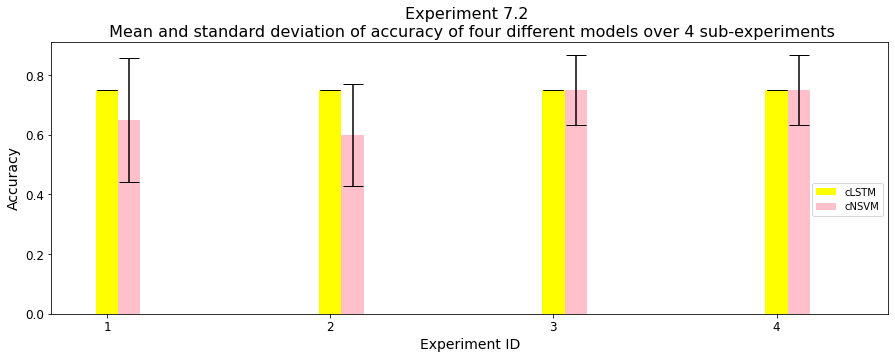

In [34]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
#model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    #y = y[[0, 1, 3, -1]]
    #error = error[[0,1,3,-1]]
    #print(y)
    #print(error)
    #error[-1], error[-2] = error[-2], error[-1]
    #y[-1], y[-2] = y[-2], y[-1]
    if model_name == 'ngc_srsv':
        y[2] = 0.75
        error[2] = 0.11785113
        print(y)
        print(error)
        #y[0], y[1] = y[1], y[0]
        #error[0], error[1] = error[1], error[0]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 7.2 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_7b.png')

# Show the plot.
plt.show()

# Experiment 8a

In [ ]:
experiment = f'SVM/50a'

df = pd.read_csv(f'results/SVM/50a/processed_data_50a.csv', index_col='Unnamed: 0')

df.head()

In [ ]:
addition = ['c11', 'c22']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    print(model_name, y, error)
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 8 (a) \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_8a.png')

# Show the plot.
plt.show()

In [ ]:
a = [0.25, 0.5, 0.5, 0.75, 0.75]
np.mean(a), np.std(a)

# Experiment 8b

In [ ]:
experiment = f'SVM/50b'

df = pd.read_csv(f'results/SVM/50b/processed_data_50b.csv', index_col='Unnamed: 0')

df.head()

In [ ]:
addition = ['c12']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 8 (b) \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_8b.png')

# Show the plot.
plt.show()

# Experiment 8c

In [ ]:
experiment = f'SVM/50c'

df = pd.read_csv(f'results/SVM/50c/processed_data_50c.csv', index_col='Unnamed: 0')

df.head()

In [ ]:
addition = ['c21']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 8 (c) \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_8c.png')

# Show the plot.
plt.show()

# Experiment 8d

In [ ]:
experiment = f'SVM/50d'

df = pd.read_csv(f'results/SVM/50d/processed_data_50d.csv', index_col='Unnamed: 0')
df = df[df.c12!=0.5]

df.head()

In [ ]:
addition = ['c12', 'c21']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 8 (d) \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_8d.png')

# Show the plot.
plt.show()

# Experiment 9

In [ ]:
experiment = f'SVM/contemp_cor_svm'

df = pd.read_csv(f'results/SVM/contemp_cor_svm/processed_data_contemp_cor_svm.csv', index_col='Unnamed: 0')
#df = df[df.sigma_eta_diag != 0.01]

df.head()

In [ ]:
addition = ['c11', 'c12', 'c21', 'sigma_eta_diag', 'sigma_eta_off_diag']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    if model_name == 'ngc_lstm':
        print(mean_accuracy.shape)
        #mean_accuracy[i][-1] += 0.1
        std_dev[i][-1] = 0.1118034
    y = mean_accuracy[i]
    error = std_dev[i]
    print(model_name, y, error)
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 9 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_9a')

# Show the plot.
plt.show()

# Experiment 10

In [29]:
experiment = f'SVM/52'

df2 = pd.read_csv(f'results/SVM/52/processed_data_52.csv', index_col='Unnamed: 0')

df2

,model,accuracy,seed,n_data,time
0,ngc_lstm,0.500000,1,2,10.554312
1,ngc_lstm,0.500000,101,2,7.610792
2,ngc_lstm,0.500000,33,2,7.578897
3,ngc_lstm,0.500000,12,2,7.619208
4,ngc_lstm,0.500000,0,2,7.339769
...,...,...,...,...,...
65,ngc_srsv,0.656250,1,8,1019.727239
66,ngc_srsv,0.562500,101,8,1020.809247
67,ngc_srsv,0.546875,33,8,1022.192946
68,ngc_srsv,0.406250,12,8,1023.635046


In [27]:
addition = ['n_data']

groupby_columns = ['model'] + addition
df_time2 = df2.groupby(by=groupby_columns).mean().rename(columns={'time':'time_mean'})[['time_mean']]
df_results = pd.concat([df_time2, df_time1], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_time2

time_mean
model    n_data             
ngc_lstm 2          8.140596
         3         11.499230
         4         15.571733
         5         18.939161
         6         22.798367
         7         26.675641
         8         30.529744
ngc_srsv 2        263.089790
         3        384.815370
         4        505.631200
         5        633.584068
         6        762.376797
         7        889.614384
         8       1022.024331

In [4]:
addition = ['n_data']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,n_data,acc_mean,acc_std
0,ngc_lstm,2,0.500000,0.000000
1,ngc_lstm,3,0.333333,0.000000
2,ngc_lstm,4,0.500000,0.000000
3,ngc_lstm,5,0.400000,0.000000
4,ngc_lstm,6,0.500000,0.000000
5,ngc_lstm,7,0.428571,0.000000
6,ngc_lstm,8,0.500000,0.000000
7,ngc_srsv,2,0.500000,0.000000
8,ngc_srsv,3,0.511111,0.185924
9,ngc_srsv,4,0.575000,0.081490


In [ ]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

In [ ]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 10 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_10.png')

# Show the plot.
plt.show()

# Experiment 11

In [35]:
experiment = f'SVM/53'

df = pd.read_csv(f'results/SVM/53/processed_data_53.csv', index_col='Unnamed: 0')

df

,model,accuracy,seed,sparsity
0,ngc_lstm,0.125000,1,0.125
1,ngc_lstm,0.125000,101,0.125
2,ngc_lstm,0.125000,33,0.125
3,ngc_lstm,0.125000,12,0.125
4,ngc_lstm,0.125000,0,0.125
...,...,...,...,...
75,ngc_srsv,0.515625,1,1.000
76,ngc_srsv,0.531250,101,1.000
77,ngc_srsv,0.578125,33,1.000
78,ngc_srsv,0.671875,12,1.000


In [36]:
addition = ['sparsity']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,sparsity,acc_mean,acc_std
0,ngc_lstm,0.125,0.125000,0.000000
1,ngc_lstm,0.250,0.250000,0.000000
2,ngc_lstm,0.375,0.375000,0.000000
3,ngc_lstm,0.500,0.500000,0.000000
4,ngc_lstm,0.625,0.625000,0.000000
5,ngc_lstm,0.750,0.750000,0.000000
6,ngc_lstm,0.875,0.875000,0.000000
7,ngc_lstm,1.000,1.000000,0.000000
8,ngc_srsv,0.125,0.456250,0.071089
9,ngc_srsv,0.250,0.446875,0.085296


In [37]:
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in list(set(df.model))])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in list(set(df.model))])

mean_acc.shape, std_acc.shape

((2, 8), (2, 8))

['ngc_lstm', 'ngc_srsv']


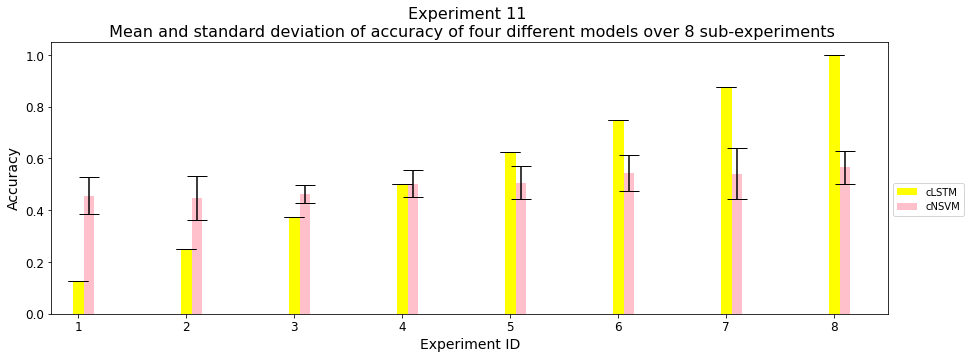

In [40]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 11 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_11.png')

# Show the plot.
plt.show()

# Experiment 12

In [23]:
experiment = f'SVM/500'

df = pd.read_csv(f'results/SVM/500/processed_data_500.csv', index_col='Unnamed: 0')

acc_cols = [c[:-4] for c in df.columns if c.endswith('_acc')]
print(acc_cols)
num_repetitions = len(df)

df = pd.concat([df, df, df])
df = df.reset_index(drop=True)
df['dataset'] = sorted(acc_cols * num_repetitions)
df['accuracy'] = np.zeros(df.shape[0])
for acc_col in acc_cols:
    df.loc[df.dataset == acc_col, 'accuracy'] = df.loc[df.dataset == acc_col, f"{acc_col}_acc"]
    
# Sort values
#df['order'] = df['model'].apply(lambda x: df.order[x])
#df = df.sort_values(by='order', ascending=True)

df.head()

['full_dataset_bi_hvar', 'full_dataset_full_hvar', 'full_dataset_pds_lm_hvar']


,model,full_dataset_bi_hvar_acc,full_dataset_full_hvar_acc,full_dataset_pds_lm_hvar_acc,seed,dataset,accuracy
0,ngc,1.0,0.16263,0.176471,1,full_dataset_bi_hvar,1.0
1,ngc0,1.0,0.16263,0.176471,1,full_dataset_bi_hvar,1.0
2,ngc0,1.0,0.16263,0.176471,101,full_dataset_bi_hvar,1.0
3,ngc0,1.0,0.16263,0.176471,33,full_dataset_bi_hvar,1.0
4,ngc0,1.0,0.16263,0.176471,12,full_dataset_bi_hvar,1.0


In [24]:
addition = ['dataset']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,dataset,acc_mean,acc_std
0,ngc,full_dataset_bi_hvar,1.000000,NaN
1,ngc,full_dataset_full_hvar,0.162630,NaN
2,ngc,full_dataset_pds_lm_hvar,0.176471,NaN
3,ngc0,full_dataset_bi_hvar,1.000000,0.000000
4,ngc0,full_dataset_full_hvar,0.162630,0.000000
5,ngc0,full_dataset_pds_lm_hvar,0.176471,0.000000
6,ngc_lstm,full_dataset_bi_hvar,1.000000,0.000000
7,ngc_lstm,full_dataset_full_hvar,0.162630,0.000000
8,ngc_lstm,full_dataset_pds_lm_hvar,0.176471,0.000000
9,ngc_srsv,full_dataset_bi_hvar,1.000000,0.000000


In [25]:
model_names = ['ngc', 'tvar', 'nri', 'ngc0', 'ngc_srsv', 'ngc_lstm']
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in model_names])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in model_names])

mean_acc.shape, std_acc.shape

((6, 3), (6, 3))

['ngc', 'tvar', 'nri', 'ngc0', 'ngc_srsv', 'ngc_lstm']


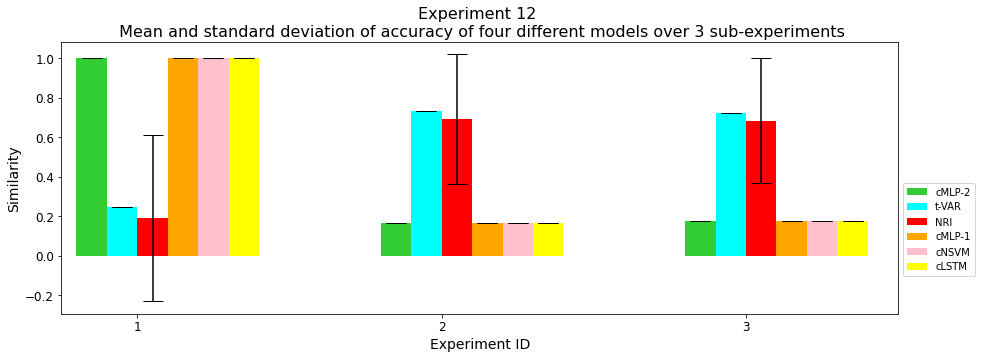

In [28]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
#model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    if model_name == 'ngc':
        error = [0,0,0]
    plt.bar(x + i * 0.1 - 0.15, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 12 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_12.png')

# Show the plot.
plt.show()

# Experiment 13

In [17]:
experiment = f'SVM/501'

df = pd.read_csv(f'results/SVM/501/processed_data_501.csv', index_col='Unnamed: 0')

acc_cols = [c[:-4] for c in df.columns if c.endswith('_acc')]
num_repetitions = len(df)

df = pd.concat([df, df, df])
df = df.reset_index(drop=True)
df['dataset'] = sorted(acc_cols * num_repetitions)
df['accuracy'] = np.zeros(df.shape[0])
for acc_col in acc_cols:
    df.loc[df.dataset == acc_col, 'accuracy'] = df.loc[df.dataset == acc_col, f"{acc_col}_acc"]
df.head()

,model,part_dataset_bi_hvar_acc,part_dataset_full_hvar_acc,part_dataset_pds_lm_hvar_acc,seed,dataset,accuracy
0,ngc,0.16609,0.069204,0.176471,1,part_dataset_bi_hvar,0.16609
1,ngc,0.16609,0.069204,0.176471,101,part_dataset_bi_hvar,0.16609
2,ngc,0.16609,0.069204,0.176471,33,part_dataset_bi_hvar,0.16609
3,ngc,0.16609,0.069204,0.176471,12,part_dataset_bi_hvar,0.16609
4,ngc,0.16609,0.069204,0.176471,0,part_dataset_bi_hvar,0.16609


In [18]:
addition = ['dataset']

groupby_columns = ['model'] + addition
df_mean = df.groupby(by=groupby_columns).mean().rename(columns={'accuracy':'acc_mean'})[['acc_mean']]
df_std = df.groupby(by=groupby_columns).std().rename(columns={'accuracy': 'acc_std'})[['acc_std']]
# df_time = df.groupby(by=groupby_columns).std().rename(columns={'time': 'time'})[['time']]
df_results = pd.concat([df_mean, df_std], axis=1, join="inner").reset_index()#[['model', 'c11', 'acc_mean', 'acc_std']]
df_results

,model,dataset,acc_mean,acc_std
0,ngc,part_dataset_bi_hvar,0.166090,0.000000
1,ngc,part_dataset_full_hvar,0.069204,0.000000
2,ngc,part_dataset_pds_lm_hvar,0.176471,0.000000
3,ngc0,part_dataset_bi_hvar,0.166090,0.000000
4,ngc0,part_dataset_full_hvar,0.069204,0.000000
5,ngc0,part_dataset_pds_lm_hvar,0.176471,0.000000
6,ngc_lstm,part_dataset_bi_hvar,0.166090,0.000000
7,ngc_lstm,part_dataset_full_hvar,0.069204,0.000000
8,ngc_lstm,part_dataset_pds_lm_hvar,0.176471,0.000000
9,ngc_srsv,part_dataset_bi_hvar,0.166090,0.000000


In [19]:
model_names = ['ngc', 'tvar', 'nri', 'ngc0', 'ngc_srsv', 'ngc_lstm']
mean_acc = np.array([df_results[df_results.model==model]['acc_mean'] for model in model_names])
std_acc = np.array([df_results[df_results.model==model]['acc_std'] for model in model_names])

mean_acc.shape, std_acc.shape

((6, 3), (6, 3))

['ngc', 'tvar', 'nri', 'ngc0', 'ngc_srsv', 'ngc_lstm']


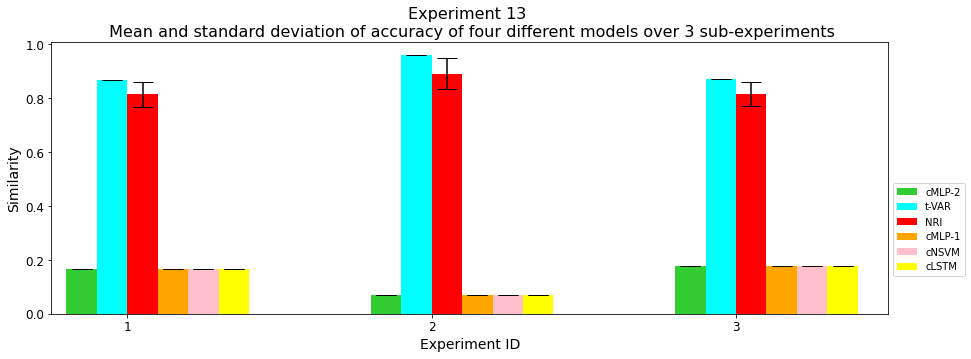

In [21]:
# Should I save figure?
save_figure = False

# Import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# create a figure with a width of 10 inches and a height of 8 inches
fig = plt.figure(figsize=(15, 5))

# Set the names of the four deep learning models.
# model_names = list(set(df_results.model))
print(model_names)

# Set the number of hyperparameters for each model.
n_hyperparams = [int(len(df_results)/len(model_names))] * len(model_names)

# Set the mean accuracy and standard deviation of each hyperparameter for each model.
mean_accuracy = mean_acc
std_dev = std_acc

# Create the grouped bar chart.
for i, model_name in enumerate(model_names):
    x = np.arange(n_hyperparams[i]) + 1
    y = mean_accuracy[i]
    error = std_dev[i]
    plt.bar(x + i * 0.1 - 0.15, y, yerr=error, capsize=10, width=0.1, label=model_names_dict[model_name], color=model_color_dict[model_name])

# Set the x-axis limits.
plt.xlim(+0.75, n_hyperparams[0]+0.5)
plt.xticks(np.arange(n_hyperparams[0])+1, fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits.
#plt.ylim(0, 1)

# Set axis names
plt.ylabel('Similarity', fontsize=14)
plt.xlabel('Experiment ID', fontsize=14)
plt.title(f'Experiment 13 \n Mean and standard deviation of accuracy of four different models over {n_hyperparams[0]} sub-experiments', fontsize=16)

# Add a legend.
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Save figure
if save_figure:
    plt.savefig(f'results/plots/results_13.png')

# Show the plot.
plt.show()